Ce fel de floare preferi? Se consideră problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi aici. Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare.

Specificaţi, proiectaţi, implementaţi si testati cate un algoritm de clasificare pentru problema 2 si problema 3 bazat pe regresie logistica. Antrenati cate un clasificator pentru fiecare problema, pe care apoi sa ii utilizati pentru a stabili:

- specia unei flori de iris care are sepala lunga de 5.35 cm si lata de 3.85 cm, iar petala lunga de 1.25 cm si lata de 0.4cm

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

data = pd.read_csv("data/iris.data", header=None, names=column_names)

data.to_csv("iris.csv", index=False)

In [30]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [31]:
data = pd.read_csv("data/iris.csv")
X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = data["class"].values

classes = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
y_numeric = np.array([classes[cls] for cls in y])

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
model_setosa = MyLogisticRegression(learning_rate=0.1, n_iters=1000)
model_versicolor = MyLogisticRegression(learning_rate=0.1, n_iters=1000)
model_virginica = MyLogisticRegression(learning_rate=0.1, n_iters=1000)


model_setosa.fit(X_train_scaled, (y_train == 0).astype(int))  # Setosa vs rest
model_versicolor.fit(X_train_scaled, (y_train == 1).astype(int))  # Versicolor vs rest
model_virginica.fit(X_train_scaled, (y_train == 2).astype(int))  # Virginica vs rest

def predict_multiclass(X, model0, model1, model2):
    proba0 = model0.predict_proba(X)
    proba1 = model1.predict_proba(X)
    proba2 = model2.predict_proba(X)
    return np.argmax(np.vstack([proba0, proba1, proba2]), axis=0)

y_pred = predict_multiclass(X_test_scaled, model_setosa, model_versicolor, model_virginica)


accuracy = np.mean(y_pred == y_test)
print(f"Acuratete MyLogisticRegression: {accuracy:.2f}")

# Sepala: 5.35x3.85, Petala: 1.25x0.4
new_flower = np.array([[5.35, 3.85, 1.25, 0.4]])
new_flower_scaled = scaler.transform(new_flower)

cls_idx = predict_multiclass(new_flower_scaled, model_setosa, model_versicolor, model_virginica)[0]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"][cls_idx]
print(f"Specia prezisă: {species}")

Acuratețe MyLogisticRegression: 0.97
Specia prezisă: Iris-setosa


In [51]:
sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train_scaled, y_train)

new_flower = np.array([[5.35, 3.85, 1.25, 0.4]])
new_flower_scaled = scaler.transform(new_flower)

cls_idx_sk = sk_model.predict(new_flower_scaled)[0]
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"][cls_idx_sk]
print(f"Specia prezisă de sklearn: {species}")

# Evaluare
train_acc = sk_model.score(X_train_scaled, y_train)
test_acc = sk_model.score(X_test_scaled, y_test)
print(f"Acuratete train: {train_acc:.2f}")
print(f"Acuratete test: {test_acc:.2f}")

# Probabilități cu sklearn
probabilities_sk = sk_model.predict_proba(new_flower_scaled)[0]

print("\nImplementarea sklearn (Softmax):")
print(f"Specie prezisă: {species}")
print("Probabilități pentru fiecare clasă:")
print(f"Setosa: {probabilities_sk[0]:.4f}")
print(f"Versicolor: {probabilities_sk[1]:.4f}")
print(f"Virginica: {probabilities_sk[2]:.4f}")

Specia prezisă de sklearn: Iris-setosa
Acuratețe train: 0.97
Acuratețe test: 1.00

Implementarea sklearn (Softmax):
Specie prezisă: Iris-setosa
Probabilități pentru fiecare clasă:
Setosa: 0.9878
Versicolor: 0.0122
Virginica: 0.0000


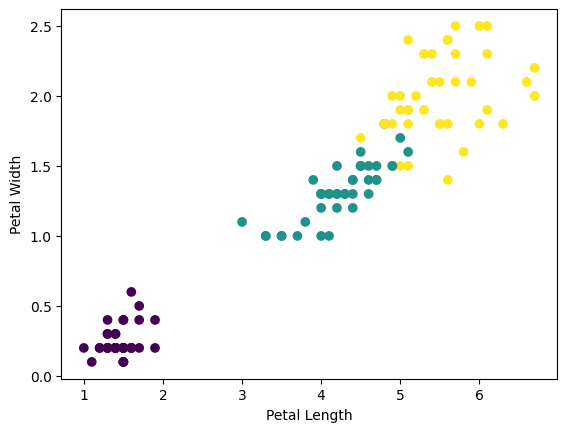

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()